In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

# Plot Temperature and Heat Fluxes

Plot the temperature and heat flux data file from the parametricscheme.py script.

These 5 plots are produced:
  * Temperature and Heat Fluxes - Separate Plots
  * Heat Fluxes - Combined Plot
  * Surface Temperature
  * Radiative Fluxes
  * Surface Fluxes

## Load and Check Data

You may need to edit the fn (filename), location (latitude & longitude) and year variables.

In [3]:
ls ../data

data.csv


In [4]:
fn = "../data/data.csv"
location = 'Lat ' + str(47.6928) + ' Long ' + str(-122.3038)
year = 2011

df = pd.read_csv(fn, sep="\t")

print("Shape:")
print(df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary stats:")
display(df.describe())
print("\nData:")
df

Shape:
(25, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     25 non-null     int64  
 1   Hour    25 non-null     int64  
 2   Minute  25 non-null     int64  
 3   Q_S     25 non-null     float64
 4   Q_Ld    25 non-null     float64
 5   Q_Lu    25 non-null     float64
 6   Q_H     25 non-null     float64
 7   Q_E     25 non-null     float64
 8   Q_G     25 non-null     float64
 9   d_T_s   25 non-null     float64
 10  T_s     25 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 2.3 KB
None

Summary stats:


,Day,Hour,Minute,Q_S,Q_Ld,Q_Lu,Q_H,Q_E,Q_G,d_T_s,T_s
count,25.000000,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,229.560000,11.560000,0.96,221.093389,94.751417,304.989334,3.588308,3.987009,9.131842,-0.169431,55.489787
std,0.506623,6.928684,0.20,232.024287,0.000000,0.000000,76.696301,85.218112,58.376453,1.271824,9.545979
min,229.000000,0.000000,0.00,0.000000,94.751417,304.989334,-69.494753,-77.216392,-57.821430,-2.149200,44.533910
25%,229.000000,6.000000,1.00,0.000000,94.751417,304.989334,-69.494753,-77.216392,-45.792363,-0.935161,46.493023
50%,230.000000,12.000000,1.00,143.597927,94.751417,304.989334,-22.028042,-24.475602,-8.401367,-0.298344,52.582706
75%,230.000000,17.000000,1.00,454.802185,94.751417,304.989334,80.841428,89.823809,56.946353,0.877273,63.259030
max,230.000000,23.000000,1.00,566.696661,94.751417,304.989334,117.828472,130.920524,110.000000,1.942061,71.996669



Data:


,Day,Hour,Minute,Q_S,Q_Ld,Q_Lu,Q_H,Q_E,Q_G,d_T_s,T_s
0,229,13,1,559.987613,94.751417,304.989334,115.610776,128.456418,110.000000,-0.001850,71.996669
1,229,14,1,521.130463,94.751417,304.989334,102.766433,114.184925,107.621893,-0.220204,71.600302
2,229,15,1,454.802185,94.751417,304.989334,80.841428,89.823809,101.853692,-0.530499,70.645403
3,229,16,1,365.522941,94.751417,304.989334,51.329915,57.033239,91.645973,-0.935161,68.962112
4,229,17,1,259.376964,94.751417,304.989334,16.243055,18.047838,76.607985,-1.374391,66.488209
5,229,18,1,143.597927,94.751417,304.989334,-22.028042,-24.475602,56.946353,-1.793988,63.259030
6,229,19,1,26.075980,94.751417,304.989334,-60.875262,-67.639180,33.384788,-2.147082,59.394283
7,229,20,1,0.000000,94.751417,304.989334,-69.494753,-77.216392,9.668927,-2.149200,55.525723
8,229,21,1,0.000000,94.751417,304.989334,-69.494753,-77.216392,-8.401367,-1.635010,52.582706
9,229,22,1,0.000000,94.751417,304.989334,-69.494753,-77.216392,-22.010531,-1.231364,50.366250


---

## Temperature and Heat Fluxes - Separate Plots

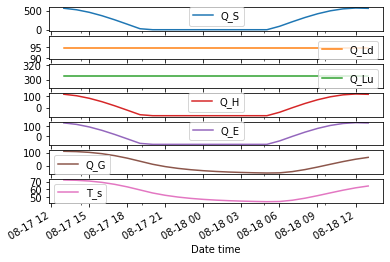

In [5]:
date_fmt = '{}-%m-%d'.format(year)
df['datetime'] = pd.to_datetime(pd.to_datetime(df['Day'], format='%j').dt.strftime(date_fmt)) + \
  pd.to_timedelta(df.Hour, unit='h') + \
  pd.to_timedelta(df.Minute, unit='m')

df_subset = df.drop(['Day', 'Hour', 'Minute', 'd_T_s'], axis=1)
df_subset.plot.line(x='datetime', subplots=True)
plt.xlabel('Date time');

---

## Heat Fluxes - Combined Plot

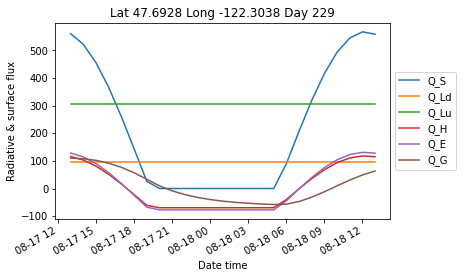

In [6]:
doy = ' Day ' + str(df.loc[0, 'Day'])
plot_title = location + doy

df_flux = df_subset.drop('T_s', axis=1)
df_flux.plot.line(x='datetime')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Radiative & surface flux')
plt.title(plot_title)
plt.xlabel('Date time');

---

## Surface Temperature

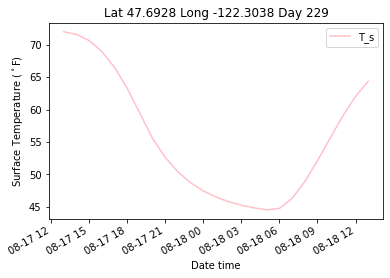

In [7]:
df.plot(x='datetime', y='T_s', color='pink')
plt.title(plot_title)
plt.ylabel('Surface Temperature ($^\circ$F)')
plt.xlabel('Date time');

---

## Radiative Fluxes

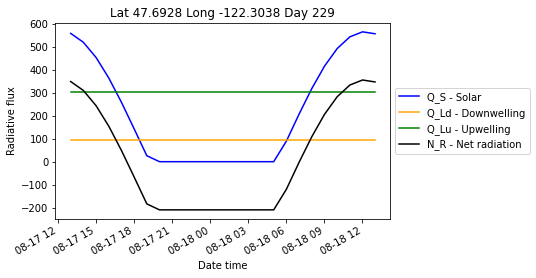

In [8]:
df_rad_flux = df_subset.drop(['Q_H','Q_E','Q_G','T_s'], axis=1)
df_rad_flux['N_R'] = df_rad_flux['Q_S'] + df_rad_flux['Q_Ld'] - df_rad_flux['Q_Lu']
df_rad_flux.plot.line(x='datetime', color=['blue','orange','green','black'])
plt.legend(['Q_S - Solar', 'Q_Ld - Downwelling', 'Q_Lu - Upwelling', 'N_R - Net radiation'], 
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Radiative flux')
plt.xlabel('Date time')
plt.title(plot_title);

---

## Surface Fluxes

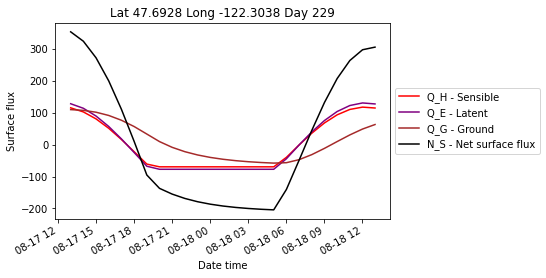

In [9]:
df_surf_flux = df_subset.drop(['Q_S','Q_Lu','Q_Ld','T_s'], axis=1)
df_surf_flux['N_S'] = df_surf_flux['Q_H'] + df_surf_flux['Q_E'] + df_surf_flux['Q_G']
df_surf_flux.plot.line(x='datetime', color=['red','purple','brown','black'], )
plt.legend(['Q_H - Sensible','Q_E - Latent','Q_G - Ground','N_S - Net surface flux'], 
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Surface flux')
plt.xlabel('Date time')
plt.title(plot_title);

---


## Archival

Archive code, markdown, history and formatted notebooks.

Assumes all pdf, html, latex etc dependencies are installed.

**WARNING** Will overwrite existing files.

In [10]:
notebook = "plot_temperature_and_fluxes.ipynb"
# !jupyter nbconvert --to script {notebook}
# !jupyter nbconvert --execute --to html {notebook}
# !jupyter nbconvert --execute --to pdf {notebook}
# !jupyter nbconvert --to pdf {notebook}

%rm history.txt
%history -f history.txt

!jupyter nbconvert --to python {notebook}
sleep(5)
!jupyter nbconvert --to markdown {notebook}
sleep(5)
!jupyter nbconvert --to html {notebook}

[NbConvertApp] Converting notebook plot_temperature_and_fluxes.ipynb to python
[NbConvertApp] Writing 3633 bytes to plot_temperature_and_fluxes.py
[NbConvertApp] Converting notebook plot_temperature_and_fluxes.ipynb to markdown
[NbConvertApp] Support files will be in plot_temperature_and_fluxes_files/
[NbConvertApp] Making directory plot_temperature_and_fluxes_files
[NbConvertApp] Making directory plot_temperature_and_fluxes_files
[NbConvertApp] Making directory plot_temperature_and_fluxes_files
[NbConvertApp] Writing 15500 bytes to plot_temperature_and_fluxes.md
[NbConvertApp] Converting notebook plot_temperature_and_fluxes.ipynb to html
[NbConvertApp] Writing 687242 bytes to plot_temperature_and_fluxes.html
